Exploratory Data Analysis
=============

### 01 - Introduction

In this notebook we will make a Exploratory Data Analysis with the following goals in mind:

* Analyze the features of our clean data in order to understand the relationship between them. Especially we will study the `loan_status` variable since it will be the target of our model
* Answer the following questions:
    1. Are the initially qualified users with a higher risk more likely to unpaid the loan? In what proportion?
    2. What are the most common debt purposes of the borrowers?
    3. What kind of employee titles do users have accessing this platform?
* Process the variables for feeding machine learning model/s.

__Importing Libraries__

In [37]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use("ggplot")
import seaborn as sns
from matplotlib import rcParams

import re

%matplotlib inline
# figure size
rcParams['figure.figsize'] = 11,6

### 02 - Knowing our data

A quick look at our data:

In [2]:
loans = pd.read_csv("../data/clean/loans.csv", sep = "^")

In [3]:
loans.head(10)

,funded_amnt_inv,term,issue_d,installment,int_rate,grade,emp_title,emp_length,annual_inc,title,dti,home_ownership,zip_code,addr_state,last_pymnt_amnt,total_pymnt_inv,total_rec_late_fee,application_type,total_acc,loan_status
0,10000.0,60 months,Mar-2016,262.34,19.53%,D,lpn/charge nurse,4 years,52000.0,Other,15.00,OWN,317xx,GA,9575.49,11127.83,0.0,Individual,12.0,Fully Paid
1,35000.0,60 months,Mar-2016,941.96,20.75%,E,Coiler,3 years,85000.0,Debt consolidation,24.98,MORTGAGE,144xx,NY,509.10,37226.47,0.0,Individual,19.0,Fully Paid
2,20000.0,60 months,Mar-2016,416.73,9.16%,B,Reliability Engineer,1 year,77000.0,Home improvement,13.75,MORTGAGE,606xx,IL,416.73,9147.70,0.0,Individual,19.0,Current
3,17475.0,60 months,Mar-2016,384.06,11.47%,B,NaN,NaN,41682.0,Debt consolidation,30.06,MORTGAGE,796xx,TX,384.06,8432.61,0.0,Individual,18.0,Current
4,8000.0,36 months,Mar-2016,255.00,9.16%,B,Technician,10+ years,72000.0,Debt consolidation,22.63,RENT,217xx,MD,255.00,5601.86,0.0,Individual,12.0,Current
5,14400.0,36 months,Mar-2016,469.74,10.75%,B,Coder,10+ years,85000.0,Business,28.11,MORTGAGE,037xx,NH,10992.93,15673.13,0.0,Individual,33.0,Fully Paid
6,18000.0,60 months,Mar-2016,400.31,11.99%,C,Registered Nurse,6 years,100000.0,Debt consolidation,20.41,MORTGAGE,986xx,WA,14885.49,20465.85,0.0,Individual,40.0,Fully Paid
7,5800.0,36 months,Mar-2016,191.18,11.47%,B,shipping,2 years,21000.0,NaN,16.91,RENT,799xx,TX,191.18,4198.57,0.0,Individual,10.0,Current
8,12500.0,60 months,Mar-2016,293.85,14.46%,C,Occupational Therapist Assisstant,1 year,91000.0,Debt consolidation,11.83,RENT,270xx,NC,293.85,6444.62,0.0,Individual,15.0,Current
9,3000.0,36 months,Mar-2016,93.17,7.39%,A,account sales manager,10+ years,90000.0,Home improvement,1.23,MORTGAGE,184xx,PA,93.17,2047.58,0.0,Individual,25.0,Current


Shape of the dataframe:

In [4]:
loans.shape

(1765426, 20)

Variable types:

In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765426 entries, 0 to 1765425
Data columns (total 20 columns):
funded_amnt_inv       float64
term                  object
issue_d               object
installment           float64
int_rate              object
grade                 object
emp_title             object
emp_length            object
annual_inc            float64
title                 object
dti                   float64
home_ownership        object
zip_code              object
addr_state            object
last_pymnt_amnt       float64
total_pymnt_inv       float64
total_rec_late_fee    float64
application_type      object
total_acc             float64
loan_status           object
dtypes: float64(8), object(12)
memory usage: 269.4+ MB


NA count:

In [6]:
loans.isnull().sum()

funded_amnt_inv            0
term                       0
issue_d                    0
installment                0
int_rate                   0
grade                      0
emp_title             112310
emp_length            104920
annual_inc                 4
title                  23325
dti                      579
home_ownership             0
zip_code                   1
addr_state                 0
last_pymnt_amnt            0
total_pymnt_inv            0
total_rec_late_fee         0
application_type           0
total_acc                 29
loan_status                0
dtype: int64

There are some NA's values in several features. For the purpose of this exploratory analysis of the data, we are not going to take them into account, although we already know that we have to deal with NA's for feeding our model. We will process NA's later in the processing phase.

### 03 - Loan Status Analysis

Since one of our project main goals is to predict whether a debt is going to be paid or not, this part of the analysis will focus on `loan_status` variable, i. e., the current status of the loan.

#### 3.1 - Loan status __distribution__:

In [7]:
loans['loan_status'].value_counts()

Current                                                843754
Fully Paid                                             698690
Charged Off                                            182199
Late (31-120 days)                                      21742
In Grace Period                                         11812
Late (16-30 days)                                        4423
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Default                                                    57
Name: loan_status, dtype: int64

We are going to consider _Does not meet the credit policy. Status:Fully Paid_ as `Fully Paid` and _Does not meet the credit policy. Status:Charged Off_ as `Charged Off` although the do not meet the credit policy.

In [8]:
loans.loc[loans['loan_status']=="Does not meet the credit policy. Status:Fully Paid", 'loan_status'] = "Fully Paid"
loans.loc[loans['loan_status']=="Does not meet the credit policy. Status:Charged Off", 'loan_status'] = "Charged Off"

In [9]:
loans['loan_status'].value_counts()

Current               843754
Fully Paid            700678
Charged Off           182960
Late (31-120 days)     21742
In Grace Period        11812
Late (16-30 days)       4423
Default                   57
Name: loan_status, dtype: int64

Let's plot the distribution in a barplot:

Text(0.5,1,'Loan Status Count')

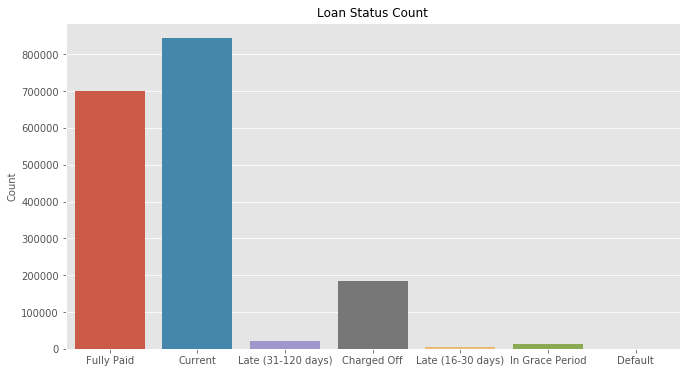

In [38]:
g = sns.countplot(x="loan_status", data=loans)

g.set_xlabel("", fontsize=6)
g.set_ylabel("Count", fontsize=10)
g.set_title("Loan Status Count", fontsize=12)

About half of the loans have been finished (`Fully Paid` and `Charged Off`) and the other half are on course (`Current` and the other _"late"_ status). For the purpose of this work, __we are going to consider `Charged Off` status as unpaid loan__. Therefore, more than 20% of the finished loans have been unpaid.

#### 3.2 - Loan status __by funded amount__:

Text(0.5,1,'Loan Amount distribution by Status')

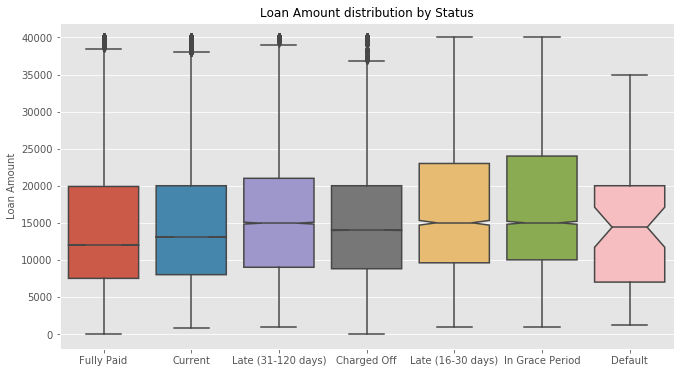

In [39]:
g = sns.boxplot(x="loan_status", y="funded_amnt_inv", 
                data=loans, notch = True) # notch for showing 95% confidence interval (median)

g.set_xlabel("", fontsize=6)
g.set_ylabel("Loan Amount", fontsize=10)
g.set_title("Loan Amount distribution by Status", fontsize=12)

It seems that there is not evidence that _default_ loan amounts are higher or lower than the _fully paid_. 

#### 3.3 - Loan status __by year__:

For this analysis we have to preprocess the `issue_d` variable. We are only interested in the year of the loan and we will not consider it as date or numeric variable but categorical:

In [14]:
loans['issue_d'] = loans['issue_d'].map(lambda x: x[4:])

Text(0.5,1,'Loan Status by Year')

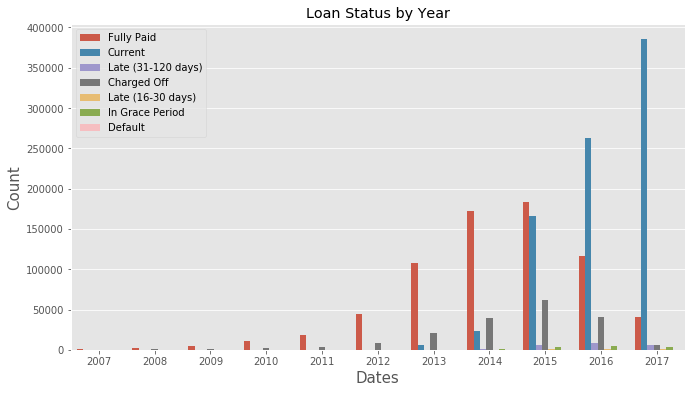

In [40]:
g = sns.countplot(x='issue_d', data=loans,
                  hue='loan_status')

g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.legend(loc="upper left")
g.set_title("Loan Status by Year")

Although the number of issued loans has been increased exponentially since 2007, the ratio between those loans that have been paid and those that have not been paid seems to be unvariable regardless of the year and the amount of issued loans.

#### 3.4 - __Unpaid loans by year__:

Text(0.5,1,'Defaults by Year')

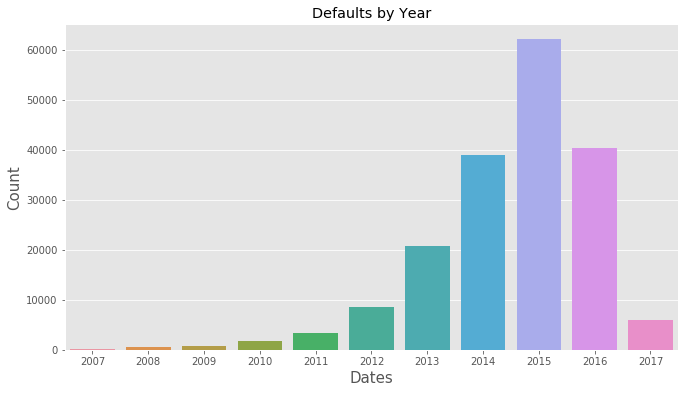

In [51]:
g = sns.countplot(x="issue_d", data=loans[(loans['loan_status']=="Charged Off") | 
                                          (loans['loan_status']=="Default")])

g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_title("Defaults by Year")

Obviously, the number of unpaid loans have decreased from 2015 due to there are many loans on course (`Current` status). 

The number of unpaid loans have exponentially increased from 2007 as well as the number of issued loans. Detect if a __new lending club user__ is going to pay a loan or not seems to be a very interesting issue to answer in this project.

#### 3.5 - Loan_status __by Grade__:

Text(0.5,1,'Loan Status by Grade')

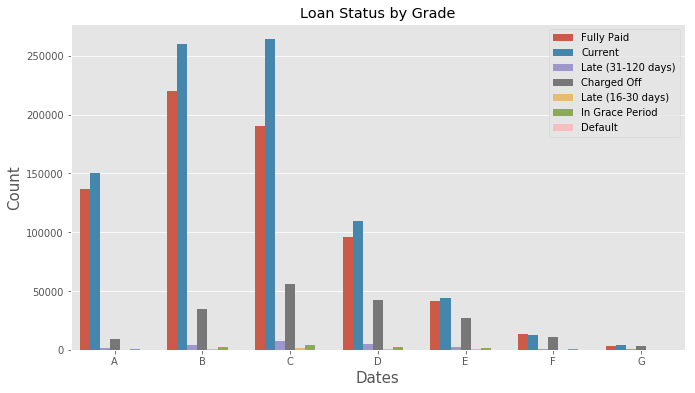

In [41]:
g = sns.countplot(x='grade', data=loans,
                  hue='loan_status', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.legend(loc="upper right")
g.set_title("Loan Status by Grade")

In [18]:
loans_by_grade = loans[(loans['loan_status'] == "Fully Paid") |
                       (loans['loan_status'] == "Charged Off")]

In [19]:
pd.crosstab(loans_by_grade['grade'], loans_by_grade['loan_status']).apply(lambda x: x/x.sum(), axis=1).\
    style.background_gradient(cmap=sns.light_palette("orange", as_cmap=True))

loan_status,Charged Off,Fully Paid
grade,,
A,0.0646124,0.935388
B,0.13604,0.86396
C,0.226056,0.773944
D,0.30622,0.69378
E,0.391078,0.608922
F,0.452067,0.547933
G,0.483798,0.516202


RELLLENAR PREGUNTA:

__¿Son los usuarios inicialmente calificados con un riesgo mayor más propensos a incurrir en impago?__

### 04 - Non Loan Status Analysis

#### 4.1 - __Purpose of the loan__:

Let's take a look the purpose of the loan:

In [20]:
loans['title'].value_counts()

Debt consolidation                          893651
Credit card refinancing                     341989
Home improvement                            104689
Other                                        92691
Major purchase                               33218
Medical expenses                             18766
Business                                     16221
Debt Consolidation                           15763
Car financing                                15547
Vacation                                     10942
Moving and relocation                        10685
Home buying                                   7284
Consolidation                                 5385
debt consolidation                            4837
Debt Consolidation Loan                       3804
Credit Card Consolidation                     2360
consolidation                                 2175
Personal Loan                                 2133
Consolidation Loan                            1778
Home Improvement               

In [21]:
loans['title'].isnull().sum()

23325

That's it!!!

In [124]:
def loan_purpose_renaming():    
    title = loans['title'].str.lower()
    title = title.dropna()
    title[title.str.contains("credit card|credit")] = "credit card refinancing"
    title[title.str.contains("debt|consolidation|consolidate|refinance")] = "debt consolidation"
    title[title.str.contains("home improvement")] = "home improvement"
    title[title.str.contains("^home$|home loan")] = "home buying"
    title[title.str.contains("green")] = "green"
    title[title.str.contains("wedding")] = "wedding"
    title[title.str.contains("medical")] = "medical"
    title[title.str.contains("personal|my loan|^loan$|lending club")] = "personal"
    title[title.str.contains("business")] = "business"
    title[title.str.contains("pay(| )off")] = "payoff"
    title[title.str.contains("car loan|car financing")] = "car"
    
    return title

In [125]:
title = loan_purpose_renaming()

Top 10 loan purpose:

Text(0.5,1,'Loan Purpose')

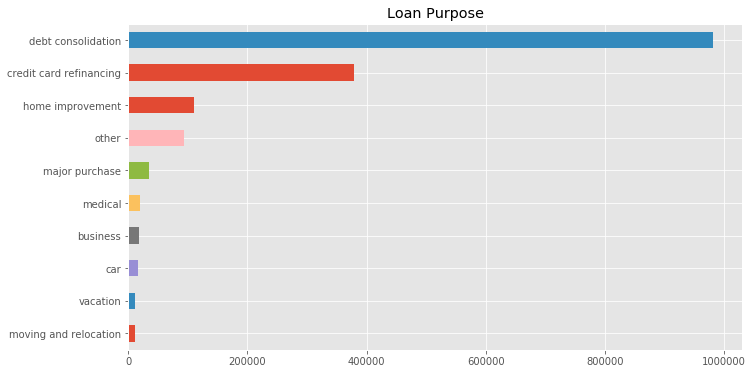

In [131]:
title.value_counts()[:10].sort_values(ascending=True).plot(kind='barh')\
    .set_title('Loan Purpose')

_Debt consolidation_ and _credit card refinancing_ are the most common loan purposes with a big difference compared to the rest of purposes. Actually, there are two purposes very related to each other so we could consider in our model a new variable that indicates whether the purpose of the loan is the refinancing of a debt / credit card.

#### 4.2 - Borrower Employee Titles:

Let's take a look at the `emp_title`:

In [29]:
loans['emp_title'].value_counts()

Teacher                                   30145
Manager                                   26290
Owner                                     16496
Registered Nurse                          12234
RN                                        11756
Supervisor                                11230
Driver                                    10445
Sales                                     10131
Project Manager                            8656
Office Manager                             7553
General Manager                            7224
Director                                   7132
owner                                      6827
President                                  6155
manager                                    5801
Engineer                                   5779
teacher                                    5522
Vice President                             4818
Operations Manager                         4724
driver                                     4430
Attorney                                

NA's count:

In [57]:
loans['emp_title'].isnull().sum()

112310

In [115]:
def emp_title_renaming():
    emp_title = loans['emp_title'].str.lower()
    emp_title = emp_title.dropna()
    
    return emp_title

In [116]:
emp_title = emp_title_renaming()

Text(0.5,1,'Employee Title')

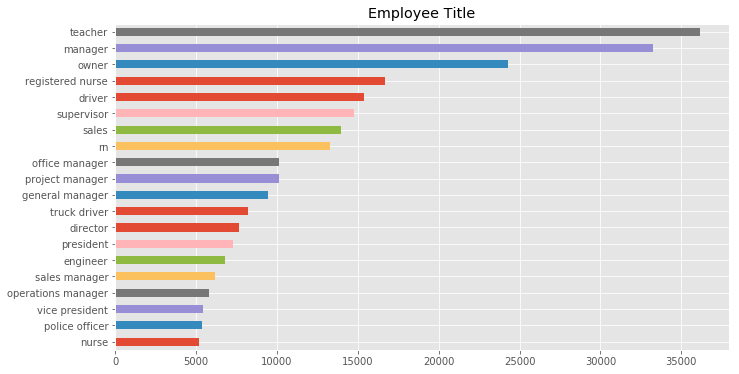

In [117]:
emp_title.value_counts()[:20].sort_values(ascending=True).plot(kind='barh')\
    .set_title('Employee Title')

Apparently, teachers are the most common users of lending club, but according to the previous plot we can see that there are several type of managers in the top 20 employee titles. Let's group them in just one employee title in order to see the number of managers in relation to the rest of the titles.

In [119]:
emp_title[emp_title.str.contains('manager')] = 'manager'

Text(0.5,1,'Employee Title with Managers grouped')

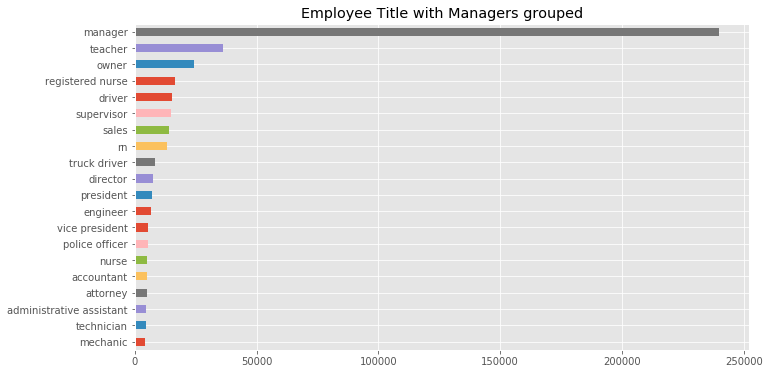

In [123]:
emp_title.value_counts()[:20].sort_values(ascending=True).plot(kind='barh')\
    .set_title('Employee Title with Managers grouped')

Definitely, managers are the most common users of the platform with a big difference compared to the rest of employee titles!!!


Therefore, in our model we can consider a new variable that indicates whether the borrower is a manager or not and remove the rest of employee titles in order to remove variables.

#### 4.3 - __Loan Amount by Application Type__ (individual or joint) and __Grade__:

Text(0.5,1,'Loan Amount by Grade and Application Type')

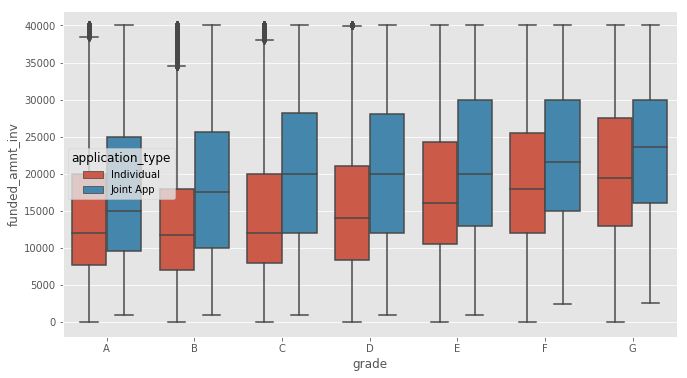

In [43]:
sns.boxplot(x="grade", y="funded_amnt_inv", data=loans, 
            hue="application_type", order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

g.set_ylabel("Loan Amount", fontsize=10)
g.set_title("Loan Amount by Grade and Application Type", fontsize=12)

#### 4.4 - __Interest Rate by Application Type__ (individual or joint) and __Grade__:

We have to take the number without the percentage symbol and then transform to float for ploting loan_status by int_rate:

In [52]:
loans['int_rate'] = loans['int_rate'].map(lambda x: float(x[:-1]))

Text(0.5,1,'Interest Rate by Grade and Application Type')

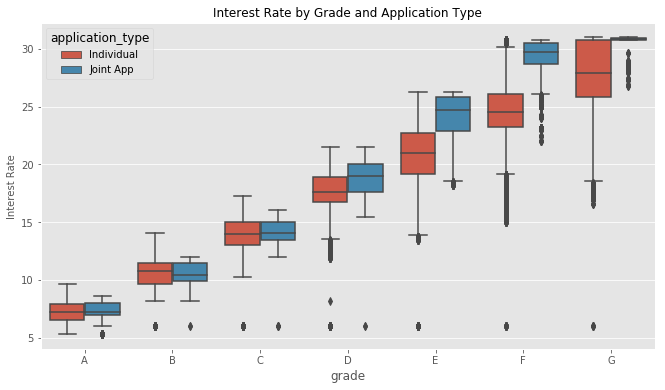

In [53]:
g = sns.boxplot(x="grade", y="int_rate", data=loans, 
                hue="application_type", order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

g.set_ylabel("Interest Rate", fontsize=10)
g.set_title("Interest Rate by Grade and Application Type", fontsize=12)

#### 4.5 - __Numeric Variables Correlation__:

In [32]:
numeric_variables = ['funded_amnt_inv', 'installment', 'int_rate', 'annual_inc', 'dti', 
                     'last_pymnt_amnt', 'total_pymnt_inv', 'total_rec_late_fee', 'total_acc']

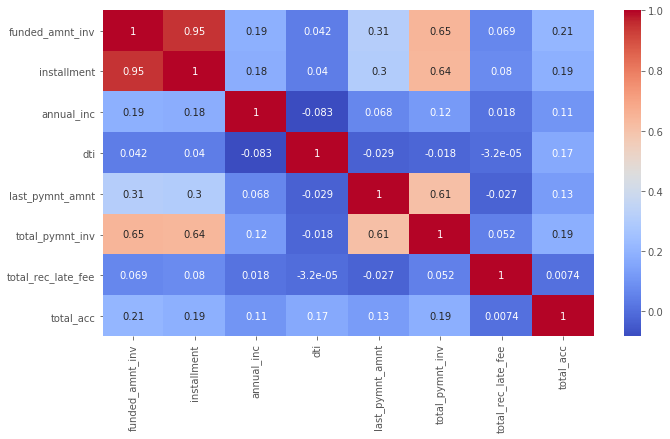

In [45]:
sns.heatmap(loans[numeric_variables].corr(),cmap="coolwarm",annot=True)

#### 4.6 - __Total monthly debt payments on the total debt obligations:__

There is a feature we have not dealt with yet. It's `dti` variable, what is a ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested lending-club loan, divided by the borrower’s self-reported monthly income.

Let's plot the distribution:

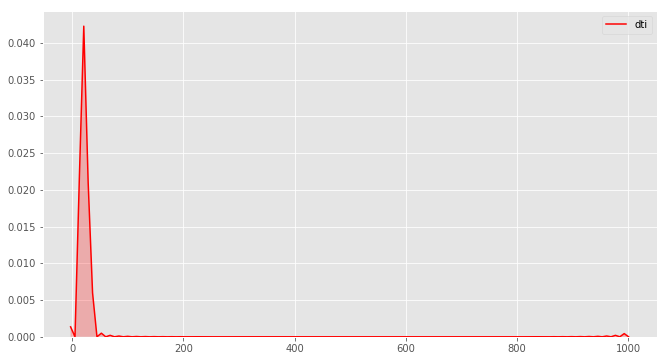

In [46]:
sns.kdeplot(loans["dti"][loans["dti"].notnull()], color="Red",shade = True)

There are some __outliers__ we have to deal with. Let's plot the `dti` distribution in a log scale and grouped by `loan_status`:

Text(0.5,1,'Total Monthly Debt Payments on the Total Debt Obligations')

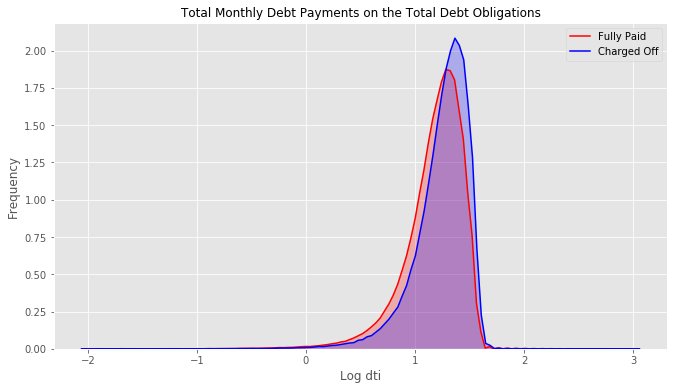

In [47]:
g=sns.kdeplot(np.log10(loans["dti"][(loans["loan_status"] == "Fully Paid") & 
                                    (loans["dti"].notnull())]), color="Red",shade = True)
g=sns.kdeplot(np.log10(loans["dti"][(loans["loan_status"] == "Charged Off") & 
                                    (loans["dti"].notnull())]), ax=g, color="Blue",shade = True)
g.set_xlabel("Log dti")
g.set_ylabel("Frequency")
g.legend(["Fully Paid","Charged Off"])
g.set_title("Total Monthly Debt Payments on the Total Debt Obligations", fontsize=12)

Interesting! This plot contains information we have to keep in mind for our model. The _fully paid_ distribution is shifted a little bit to the left (taking into account that it is in logarithmic scale) with respect to the _charge off_ distribution.

The next phase of our project will be to choose what variables are the most important ones and how to process them (based on the analysis made in this notebook) for feeding our model.